# Internet Penetration Rate % Analysis

Importing the libraries and dataset

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk 
import seaborn as sns

data = pd.read_csv('Datasets\merged_data_panel.csv', sep=',')
data.columns = list(map(str.strip, data.columns)) # Aligning column names

# Filter the data for Romania and South Korea
romania_data = data[data['Country'] == 'Romania']
korea_data = data[data['Country'] == 'Korea, Rep.']

# Set the index to the Year column
romania_data.set_index('Year', inplace=True)
korea_data.set_index('Year', inplace=True)


Visualizing the Internet Penetration Rates for both Romania and South Korea

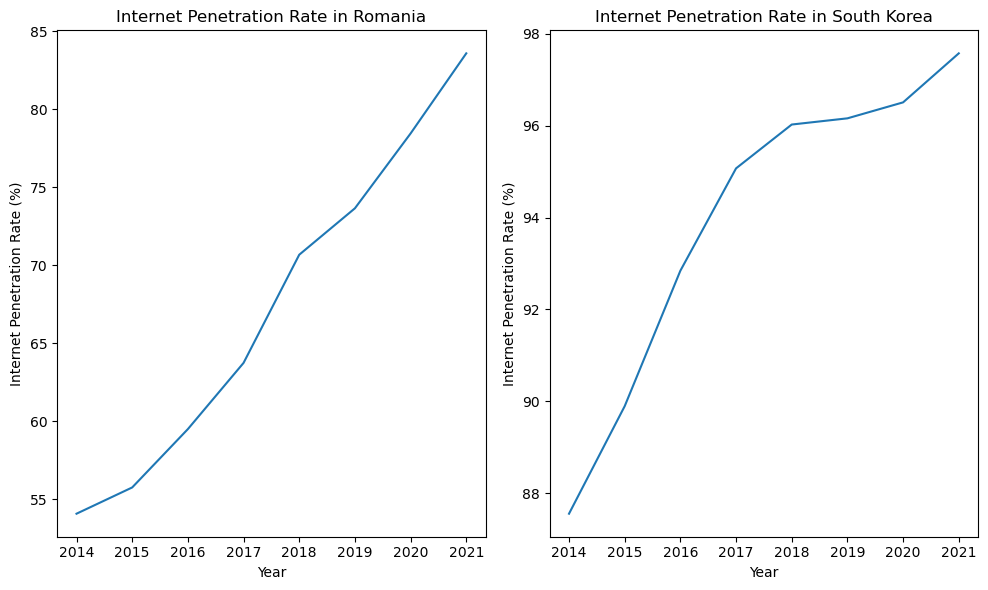

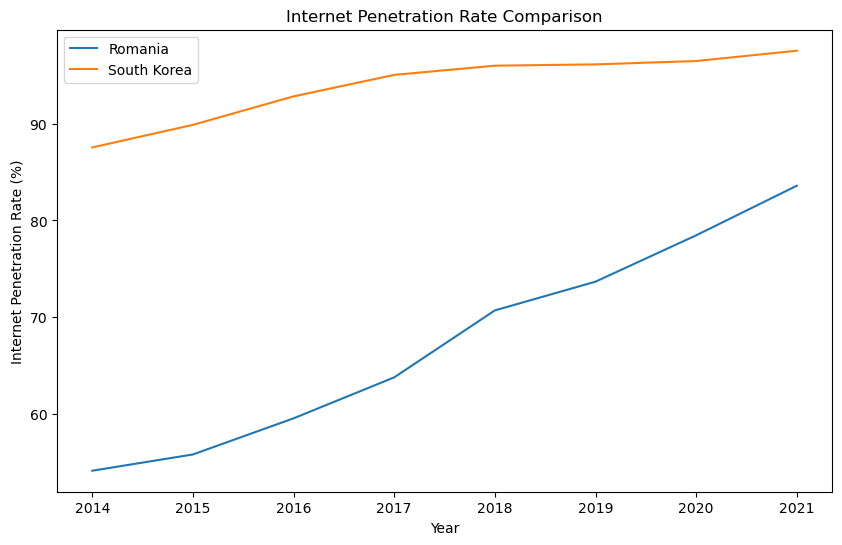

In [3]:
fig, axes = plt.subplots(1, 2, figsize=(10, 6))

# Internet Penetration Rate in Romania
sns.lineplot(data=romania_data, x='Year', y='Int Pen Rate %', ax=axes[0])
axes[0].set_title('Internet Penetration Rate in Romania')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Internet Penetration Rate (%)')

# Internet Penetration Rate in South Korea
sns.lineplot(data=korea_data, x='Year', y='Int Pen Rate %', ax=axes[1])
axes[1].set_title('Internet Penetration Rate in South Korea')
axes[1].set_xlabel('Year')
axes[1].set_ylabel('Internet Penetration Rate (%)')

plt.tight_layout()
plt.show()

# Internet Penetration Rate Comparison Plot 
plt.figure(figsize=(10, 6))
sns.lineplot(data=romania_data, x='Year', y='Int Pen Rate %', label='Romania')
sns.lineplot(data=korea_data, x='Year', y='Int Pen Rate %', label='South Korea')
plt.xlabel('Year')
plt.ylabel('Internet Penetration Rate (%)')
plt.title('Internet Penetration Rate Comparison')
plt.legend()
plt.show()


Visualizing important socio-economic indicators

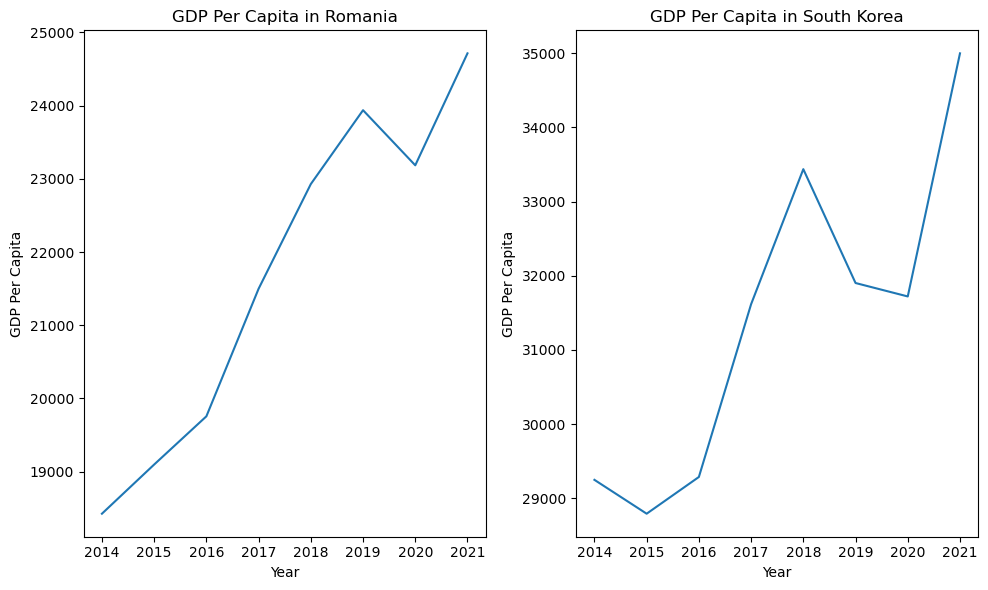

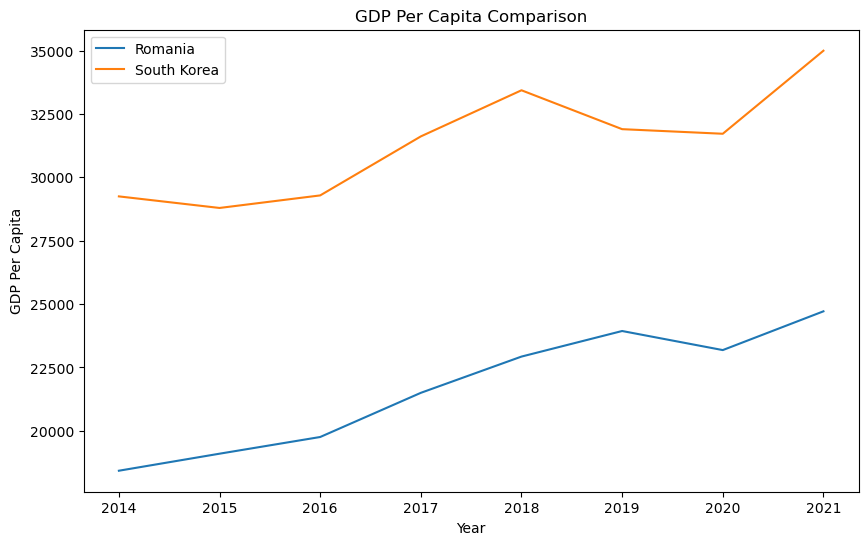

In [4]:
fig, axes = plt.subplots(1, 2, figsize=(10, 6))

# GDP Per Capita in Romania
sns.lineplot(data=romania_data, x='Year', y='GDP Per Capita', ax=axes[0])
axes[0].set_title('GDP Per Capita in Romania')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('GDP Per Capita')

# GDP Per Capita in South Korea
sns.lineplot(data=korea_data, x='Year', y='GDP Per Capita', ax=axes[1])
axes[1].set_title('GDP Per Capita in South Korea')
axes[1].set_xlabel('Year')
axes[1].set_ylabel('GDP Per Capita')

plt.tight_layout()
plt.show()

# GDP Comparison Plot
plt.figure(figsize=(10, 6))
sns.lineplot(data=romania_data, x='Year', y='GDP Per Capita', label='Romania')
sns.lineplot(data=korea_data, x='Year', y='GDP Per Capita', label='South Korea')
plt.xlabel('Year')
plt.ylabel('GDP Per Capita')
plt.title('GDP Per Capita Comparison')
plt.legend()
plt.show()


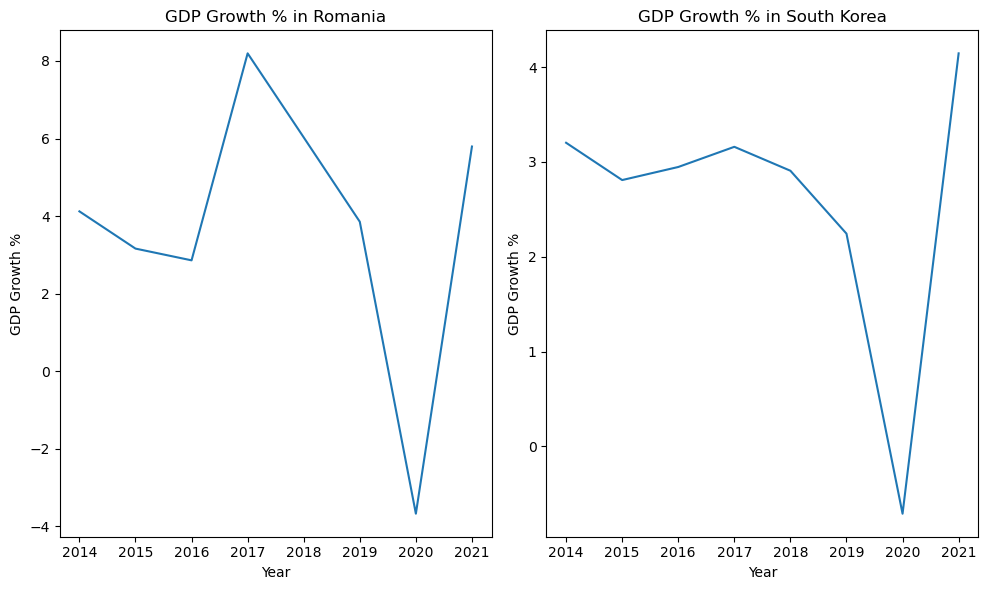

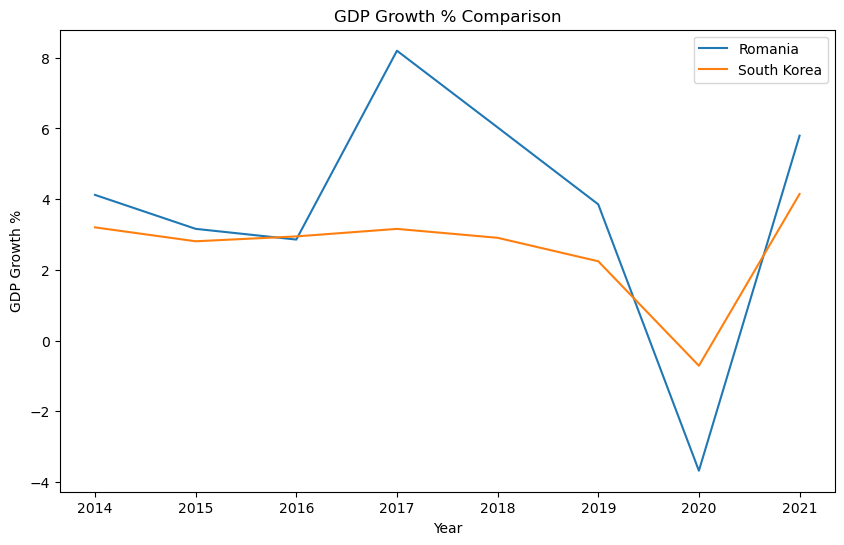

In [5]:
fig, axes = plt.subplots(1, 2, figsize=(10, 6))

# GDP Growth % in Romania
sns.lineplot(data=romania_data, x='Year', y='GDP Growth %', ax=axes[0])
axes[0].set_title('GDP Growth % in Romania')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('GDP Growth %')

# GDP Growth % in South Korea
sns.lineplot(data=korea_data, x='Year', y='GDP Growth %', ax=axes[1])
axes[1].set_title('GDP Growth % in South Korea')
axes[1].set_xlabel('Year')
axes[1].set_ylabel('GDP Growth %')

plt.tight_layout()
plt.show()

# GDP Growth % Comparison Plot 
plt.figure(figsize=(10, 6))
sns.lineplot(data=romania_data, x='Year', y='GDP Growth %', label='Romania')
sns.lineplot(data=korea_data, x='Year', y='GDP Growth %', label='South Korea')
plt.xlabel('Year')
plt.ylabel('GDP Growth %')
plt.title('GDP Growth % Comparison')
plt.legend()
plt.show()

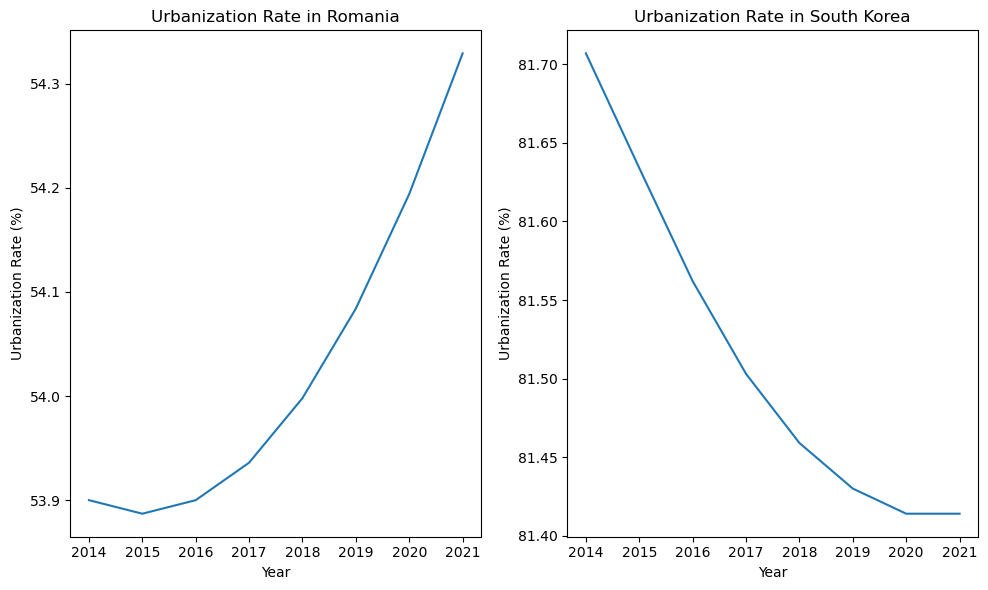

In [6]:
fig, axes = plt.subplots(1, 2, figsize=(10, 6))

# Urbanization Rate in Romania
sns.lineplot(data=romania_data, x='Year', y='Urbanization Rate %', ax=axes[0])
axes[0].set_title('Urbanization Rate in Romania')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Urbanization Rate (%)')

# Urbanization Rate in South Korea
sns.lineplot(data=korea_data, x='Year', y='Urbanization Rate %', ax=axes[1])
axes[1].set_title('Urbanization Rate in South Korea')
axes[1].set_xlabel('Year')
axes[1].set_ylabel('Urbanization Rate (%)')

plt.tight_layout()
plt.show()

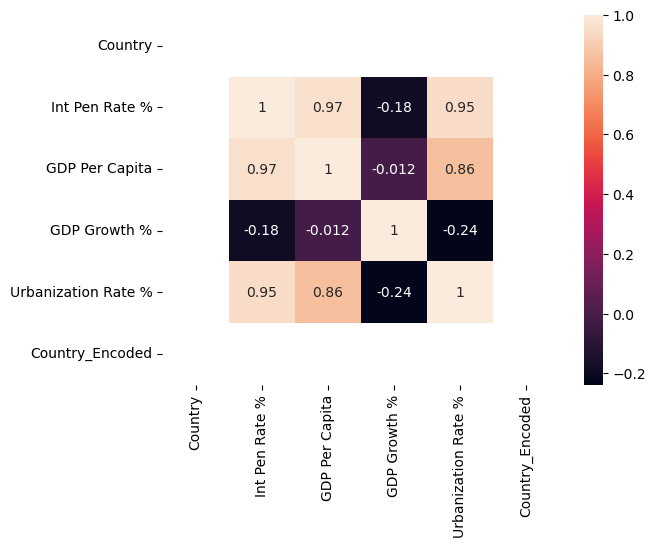

In [60]:
# Romania Coefficients Correlation Heatmap
tc = romania_data.corr()
annot = True
sns.heatmap(tc, annot = annot)
plt.show()

C:\Users\Iustin\AppData\Local\Temp\ipykernel_20088\1814018830.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  tc = korea_data.corr()


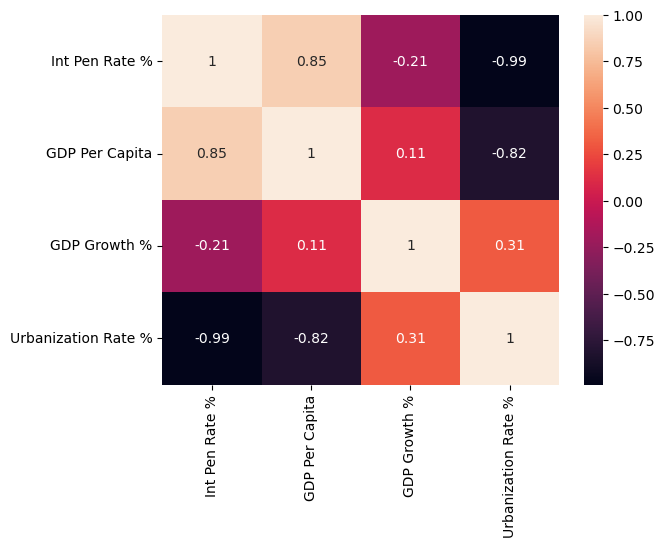

In [61]:
# South Korea Coefficients Correlation Heatmap
tc = korea_data.corr()
annot = True
sns.heatmap(tc, annot = annot)
plt.show()

## ARIMA

### Determining the parameters (p,d,q)

Autocorrelation and Partial Autocorrelation

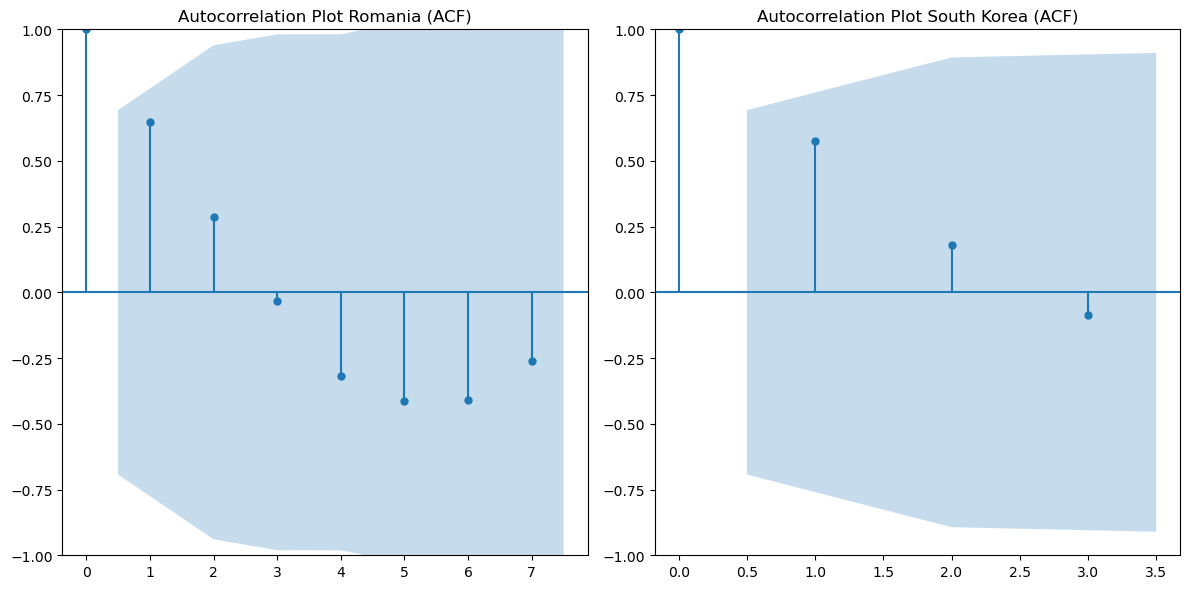

In [7]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics import tsaplots

int_pen_rate_ro = romania_data[['Int Pen Rate %']]
int_pen_rate_ko = korea_data[['Int Pen Rate %']]

# Autocorrelation plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Romania
tsaplots.plot_acf(int_pen_rate_ro, ax=ax1)
ax1.set_title('Autocorrelation Plot Romania (ACF)')

# US
tsaplots.plot_acf(int_pen_rate_ko, lags=3, ax=ax2)
ax2.set_title('Autocorrelation Plot South Korea (ACF)')

plt.tight_layout()
plt.show()

1st Order Differencing and Autocorrelation 

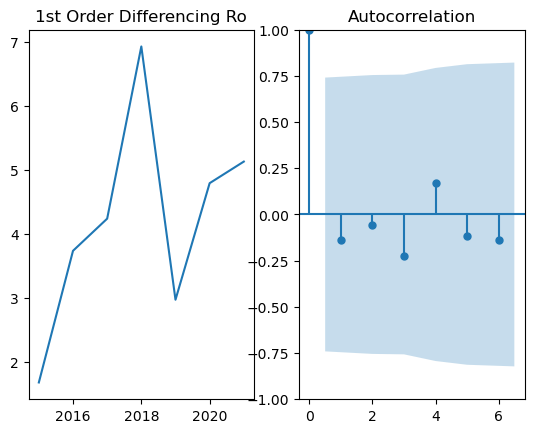

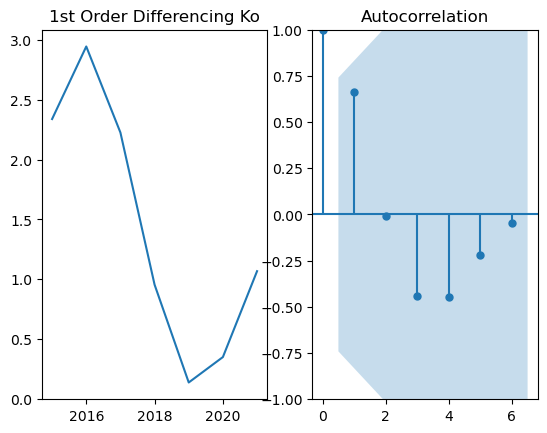

In [8]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics import tsaplots

# Romania
f = plt.figure()
ax1 = f.add_subplot(121)
ax1.set_title('1st Order Differencing Ro')
ax1.plot(int_pen_rate_ro.diff())

ax2 = f.add_subplot(122)
plot_acf(int_pen_rate_ro.diff().dropna(), ax = ax2)
plt.show()

# US
f = plt.figure()
ax1 = f.add_subplot(121)
ax1.set_title('1st Order Differencing Ko')
ax1.plot(int_pen_rate_ko.diff())

ax2 = f.add_subplot(122)
plot_acf(int_pen_rate_ko.diff().dropna(), ax = ax2)
plt.show()

2nd Order Differencing and Autocorrelation

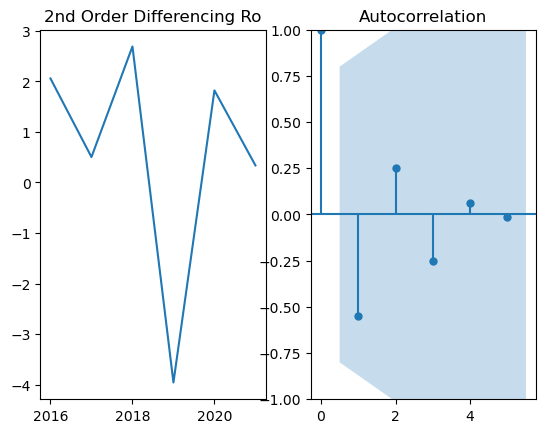

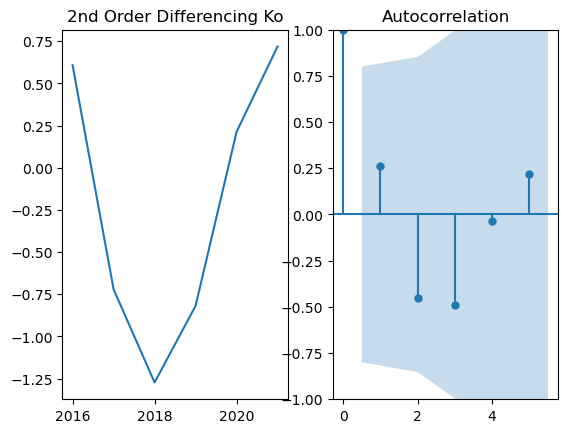

In [9]:
# Romania
f = plt.figure()
ax1 = f.add_subplot(121)
ax1.set_title('2nd Order Differencing Ro')
ax1.plot(int_pen_rate_ro.diff().diff())

ax2 = f.add_subplot(122)
plot_acf(int_pen_rate_ro.diff().diff().dropna(), ax = ax2)
plt.show()

# The 1st Order Differencing plot proves to be more statistically significant than the 2nd Order Differencing plot
# p = 1, number of autoregressive terms

# US
f = plt.figure()
ax1 = f.add_subplot(121)
ax1.set_title('2nd Order Differencing Ko')
ax1.plot(int_pen_rate_ko.diff().diff())

ax2 = f.add_subplot(122)
plot_acf(int_pen_rate_ko.diff().diff().dropna(), ax = ax2)
plt.show()
 
# The 1st Order Differencing plot proves to be more statistically significant than the 2nd Order Differencing plot
# p = 1, number of autoregressive terms

Augmented Dickey-Fuller test for stationarity

In [10]:
from statsmodels.tsa.stattools import adfuller

print('Romania')
result = adfuller(int_pen_rate_ro.dropna())
print('p-value:', result[1])

result = adfuller(int_pen_rate_ro.diff().dropna())
print('p-value:', result[1])

result = adfuller(int_pen_rate_ro.diff().diff().dropna())
print('p-value:', result[1])
print('\n')

# As we compare the values below, we can see that after the 1st order differencing, the p-value drops below the acceptable threshold of 0.05.
# So the data is stationary.
# Thus we can consider the "d" parameter: number of nonseasonal differencing = 1/2.

print('South Korea')
result = adfuller(int_pen_rate_ko.dropna())
print('p-value:', result[1])

result = adfuller(int_pen_rate_ko.diff().dropna())
print('p-value:', result[1])

result = adfuller(int_pen_rate_ko.diff().diff().dropna())
print('p-value:', result[1])

# "d" parameter = 1/2

Romania
p-value: 0.9944578670459376
p-value: 0.03876497107253085
p-value: 0.010144522377534729


South Korea
p-value: 0.5231063558810599
p-value: 0.0
p-value: 3.03213444608845e-08


<b>Building ARIMA Model for Internet Penetration Rate<b>

In [11]:
from statsmodels.tsa.arima.model import ARIMA

# Romania
# Define the order for the ARIMA model
order = (1, 2, 1)

# Create the ARIMA model for Internet Pen Rate
ro_model = ARIMA(romania_data['Int Pen Rate %'], order=order)
ro_model_fit = ro_model.fit()
# Predict the Internet Pen Rate for 2022, 2023 and 2024
forecast_ro_pen_rate = ro_model_fit.forecast(steps=3)

print(ro_model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:         Int Pen Rate %   No. Observations:                    8
Model:                 ARIMA(1, 2, 1)   Log Likelihood                 -12.503
Date:                Sun, 30 Jul 2023   AIC                             31.006
Time:                        12:14:36   BIC                             30.381
Sample:                             0   HQIC                            28.505
                                  - 8                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1222      2.588     -0.047      0.962      -5.195       4.951
ma.L1         -0.5957      2.359     -0.253      0.801      -5.220       4.028
sigma2         3.4246      2.884      1.187      0.2

c:\Users\Iustin\anaconda3\envs\DataScience\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Iustin\anaconda3\envs\DataScience\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Iustin\anaconda3\envs\DataScience\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Iustin\anaconda3\envs\DataScience\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\Iustin\anaconda3\envs\DataScience\lib\site-packages\statsmodels\tsa\ba

In [36]:
# South Korea

# Create the ARIMA model for Internet Pen Rate
ko_model = ARIMA(korea_data['Int Pen Rate %'], order=(0,2,0))
ko_model_fit = ko_model.fit()
# Predict the Internet Pen Rate for 2022, 2023 and 2024
forecast_ko_pen_rate = ko_model_fit.forecast(steps=3)

print(ko_model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:         Int Pen Rate %   No. Observations:                    8
Model:                 ARIMA(0, 2, 0)   Log Likelihood                  -7.096
Date:                Sun, 30 Jul 2023   AIC                             16.192
Time:                        12:20:58   BIC                             15.984
Sample:                             0   HQIC                            15.358
                                  - 8                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.6234      0.653      0.955      0.340      -0.656       1.903
Ljung-Box (L1) (Q):                   0.65   Jarque-Bera (JB):                 0.69
Prob(Q):                              0.42   Pr

c:\Users\Iustin\anaconda3\envs\DataScience\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Iustin\anaconda3\envs\DataScience\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Iustin\anaconda3\envs\DataScience\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Iustin\anaconda3\envs\DataScience\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


<b>Building ARIMA Model for GDP Per Capita<b>

In [13]:
# Romania
ro_model_gdp_per_capita = ARIMA(romania_data['GDP Per Capita'], order=(1,2,2))
ro_model_gdp_per_capita_fit = ro_model_gdp_per_capita.fit()

# Predict the GDP Per Capita for 2022, 2023 and 2024
forecast_ro_gdp_per_capita = ro_model_gdp_per_capita_fit.forecast(steps=3)

print(ro_model_gdp_per_capita_fit.summary())


c:\Users\Iustin\anaconda3\envs\DataScience\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Iustin\anaconda3\envs\DataScience\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Iustin\anaconda3\envs\DataScience\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Iustin\anaconda3\envs\DataScience\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


c:\Users\Iustin\anaconda3\envs\DataScience\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


                               SARIMAX Results                                
Dep. Variable:         GDP Per Capita   No. Observations:                    8
Model:                 ARIMA(1, 2, 2)   Log Likelihood                 -49.634
Date:                Sun, 30 Jul 2023   AIC                            107.267
Time:                        12:14:37   BIC                            106.434
Sample:                             0   HQIC                           103.933
                                  - 8                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7892      0.552     -1.429      0.153      -1.872       0.293
ma.L1          0.7550      2.640      0.286      0.775      -4.420       5.930
ma.L2         -0.2450      0.384     -0.639      0.5

<b>Building ARIMA Model for GDP Growth %<b>

In [14]:
# Romania
ro_model_gdp_growth = ARIMA(romania_data['GDP Growth %'], order=(1,2,2))
ro_model_gdp_growth_fit = ro_model_gdp_growth.fit()

# Predict the GDP Growth for 2022, 2023 and 2024
forecast_ro_gdp_growth = ro_model_gdp_growth_fit.forecast(steps=3)

print(ro_model_gdp_growth_fit.summary())

                               SARIMAX Results                                
Dep. Variable:           GDP Growth %   No. Observations:                    8
Model:                 ARIMA(1, 2, 2)   Log Likelihood                 -19.443
Date:                Sun, 30 Jul 2023   AIC                             46.887
Time:                        12:14:37   BIC                             46.054
Sample:                             0   HQIC                            43.552
                                  - 8                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8838      2.281     -0.387      0.698      -5.354       3.587
ma.L1         -0.3236    515.259     -0.001      0.999   -1010.213    1009.566
ma.L2         -0.6752    353.002     -0.002      0.9

c:\Users\Iustin\anaconda3\envs\DataScience\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Iustin\anaconda3\envs\DataScience\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Iustin\anaconda3\envs\DataScience\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Iustin\anaconda3\envs\DataScience\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\Users\Iustin\an

<b>Building ARIMA Model for Urbanization Rate %<b>

In [15]:
# Romania 
ro_model_urb_rate = ARIMA(romania_data['Urbanization Rate %'], order=(1,2,2))
ro_model_urb_rate_fit = ro_model_urb_rate.fit()

# Predict the GDP Growth for 2022, 2023 and 2024
forecast_ro_urb_rate = ro_model_urb_rate_fit.forecast(steps=3)

print(ro_model_urb_rate_fit.summary())


c:\Users\Iustin\anaconda3\envs\DataScience\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Iustin\anaconda3\envs\DataScience\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Iustin\anaconda3\envs\DataScience\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Iustin\anaconda3\envs\DataScience\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                SARIMAX Results                                
Dep. Variable:     Urbanization Rate %   No. Observations:                    8
Model:                  ARIMA(1, 2, 2)   Log Likelihood                  21.147
Date:                 Sun, 30 Jul 2023   AIC                            -34.293
Time:                         12:14:37   BIC                            -35.126
Sample:                              0   HQIC                           -37.628
                                   - 8                                         
Covariance Type:                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7461      0.347      2.149      0.032       0.066       1.426
ma.L1          1.1819      2.883      0.410      0.682      -4.469       6.833
ma.L2          0.6500      5.154      0.126 

c:\Users\Iustin\anaconda3\envs\DataScience\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


### Visualizing the predictions for years 2022, 2023 and 2024

In [16]:
# Print the forecasted values
print("Romania\n")
print("Internet Pen Rate % forecast:")
print(forecast_ro_pen_rate)
print("\nGDP Per Capita forecast:")
print(forecast_ro_gdp_per_capita)
print("\nGDP Growth % forecast:")
print(forecast_ro_gdp_growth)
print("\nUrbanization Rate % forecast:")
print(forecast_ro_urb_rate)


Romania

Internet Pen Rate % forecast:
8     88.206150
9     92.885359
10    97.556809
Name: predicted_mean, dtype: float64

GDP Per Capita forecast:
8     25718.395360
9     26803.998689
10    27825.317428
Name: predicted_mean, dtype: float64

GDP Growth % forecast:
8     2.493815
9     5.267847
10    2.674409
Name: predicted_mean, dtype: float64

Urbanization Rate % forecast:
8     54.488794
9     54.668237
10    54.862340
Name: predicted_mean, dtype: float64


In [38]:
# Print the forecasted values
forecast_ko_pen_rate = np.minimum(forecast_ko_pen_rate, 100.0) 
# I used np.minimum to limit the predictions up to 100%, because 2024 got a value of 100.77%
print("South Korea\n")
print("Internet Pen Rate % forecast:")
print(forecast_ko_pen_rate)

South Korea

Internet Pen Rate % forecast:
8      98.637594
9      99.703862
10    100.000000
Name: predicted_mean, dtype: float64


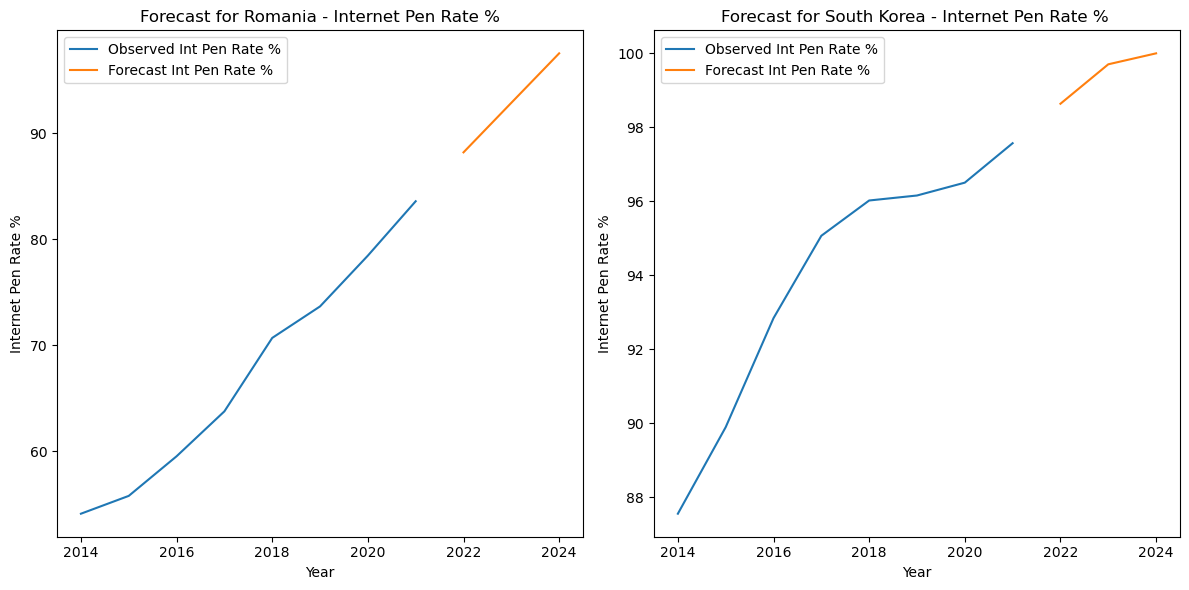

In [41]:
# Create a figure and axis objects for the subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Plot for Romania
ax1.plot(romania_data.index, romania_data['Int Pen Rate %'], label='Observed Int Pen Rate %')
ax1.plot([2022, 2023, 2024], forecast_ro_pen_rate, label='Forecast Int Pen Rate %')
ax1.set_xlabel('Year')
ax1.set_ylabel('Internet Pen Rate %')
ax1.set_title('Forecast for Romania - Internet Pen Rate %')
ax1.legend()

# Plot for the US
ax2.plot(korea_data.index, korea_data['Int Pen Rate %'], label='Observed Int Pen Rate %')
ax2.plot([2022, 2023, 2024], forecast_ko_pen_rate, label='Forecast Int Pen Rate %')
ax2.set_xlabel('Year')
ax2.set_ylabel('Internet Pen Rate %')
ax2.set_title('Forecast for South Korea - Internet Pen Rate % ')
ax2.legend()

# Display the plots
plt.tight_layout()
plt.show()

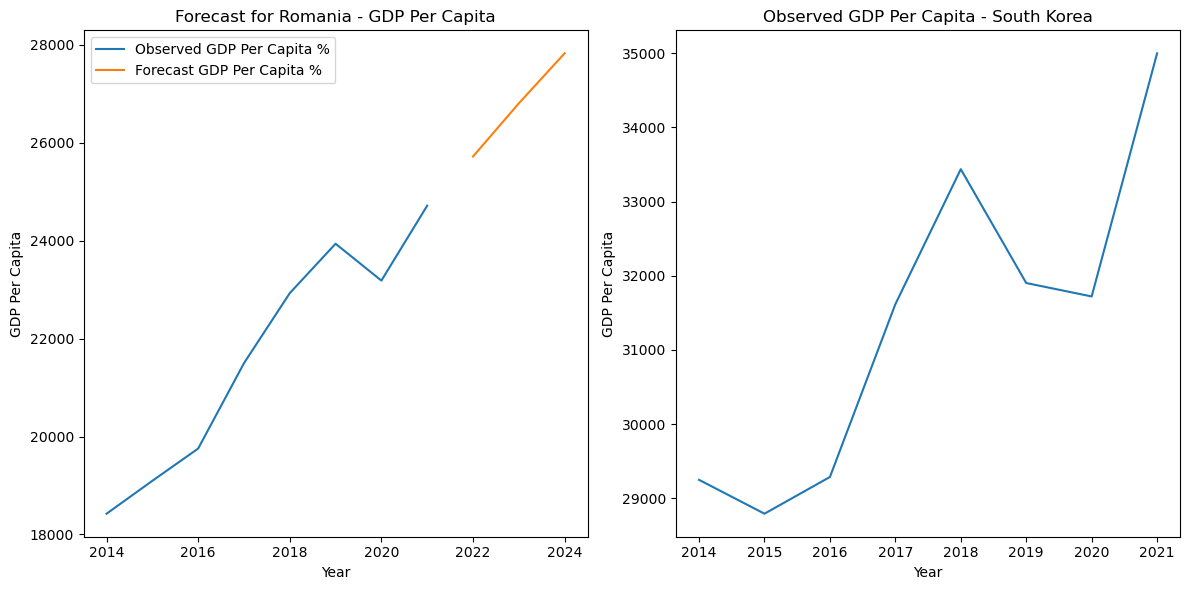

In [19]:

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Plot for Romania
ax1.plot(romania_data.index, romania_data['GDP Per Capita'], label='Observed GDP Per Capita %')
ax1.plot([2022, 2023, 2024], forecast_ro_gdp_per_capita, label='Forecast GDP Per Capita %')
ax1.set_xlabel('Year')
ax1.set_ylabel('GDP Per Capita')
ax1.set_title('Forecast for Romania - GDP Per Capita')
ax1.legend()

# Plot for the US
ax2.plot(korea_data.index, korea_data['GDP Per Capita'])
ax2.set_xlabel('Year')
ax2.set_ylabel('GDP Per Capita')
ax2.set_title('Observed GDP Per Capita - South Korea')

# Display the plots
plt.tight_layout()
plt.show()

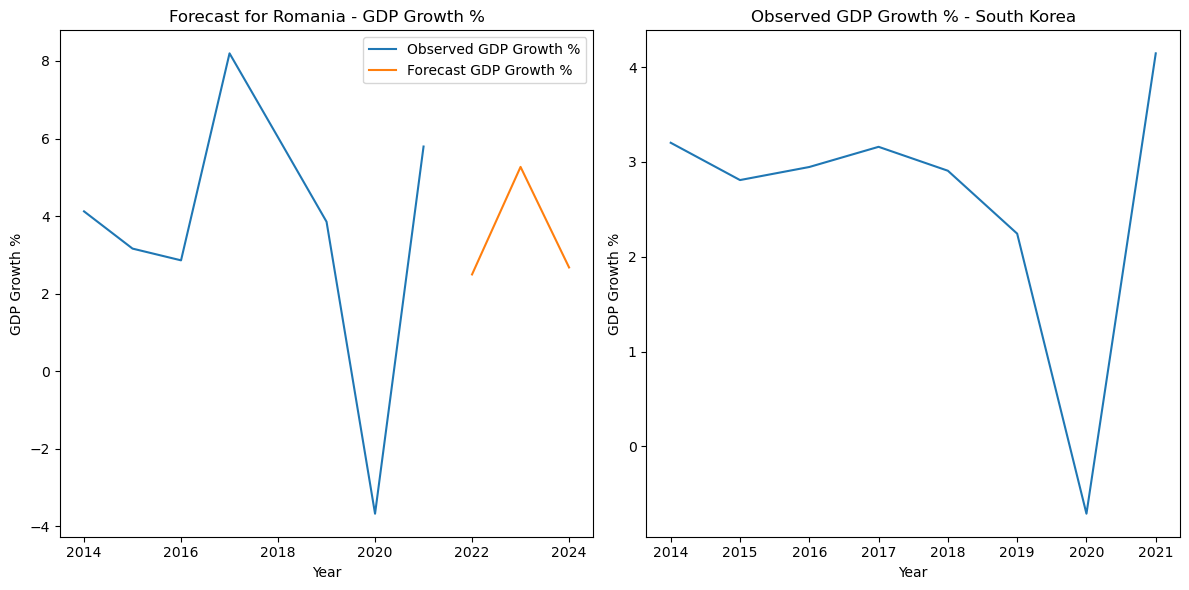

In [20]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Plot for Romania
ax1.plot(romania_data.index, romania_data['GDP Growth %'], label='Observed GDP Growth %')
ax1.plot([2022, 2023, 2024], forecast_ro_gdp_growth, label='Forecast GDP Growth %')
ax1.set_xlabel('Year')
ax1.set_ylabel('GDP Growth %')
ax1.set_title('Forecast for Romania - GDP Growth %')
ax1.legend()

# Plot for the US
ax2.plot(korea_data.index, korea_data['GDP Growth %'], label='Observed GDP Growth %')
ax2.set_xlabel('Year')
ax2.set_ylabel('GDP Growth %')
ax2.set_title('Observed GDP Growth % - South Korea')

# Display the plots
plt.tight_layout()
plt.show()

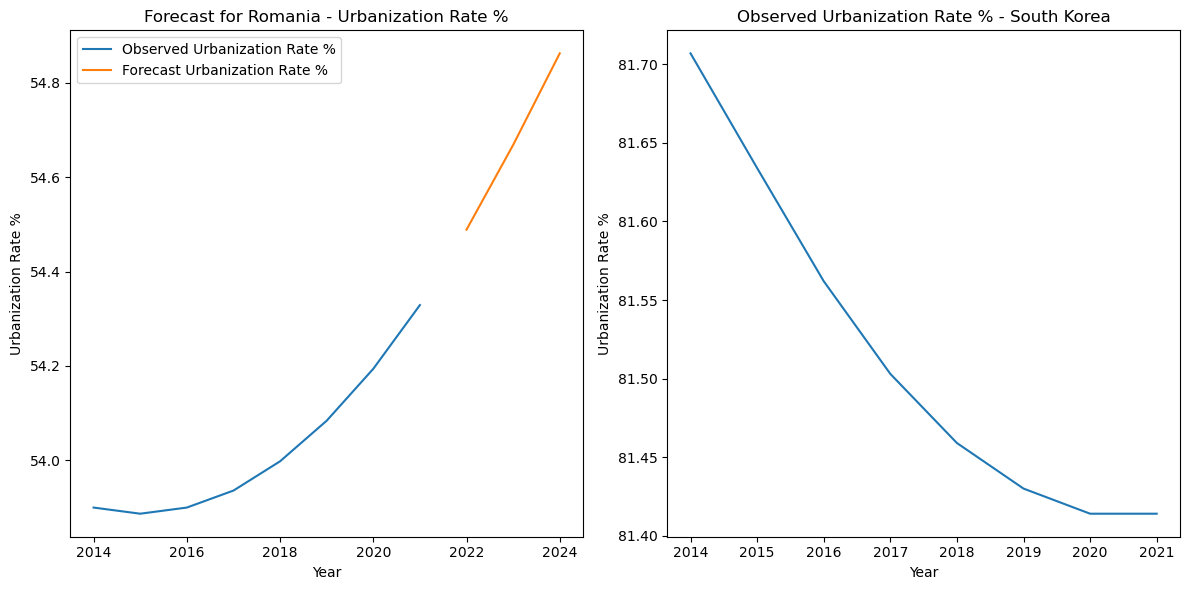

In [21]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Plot for Romania
ax1.plot(romania_data.index, romania_data['Urbanization Rate %'], label='Observed Urbanization Rate %')
ax1.plot([2022, 2023, 2024], forecast_ro_urb_rate, label='Forecast Urbanization Rate %')
ax1.set_xlabel('Year')
ax1.set_ylabel('Urbanization Rate %')
ax1.set_title('Forecast for Romania - Urbanization Rate %')
ax1.legend()

# Plot for the US
ax2.plot(korea_data.index, korea_data['Urbanization Rate %'], label='Observed Urbanization Rate %')
ax2.set_xlabel('Year')
ax2.set_ylabel('Urbanization Rate %')
ax2.set_title('Observed Urbanization Rate % - South Korea')

# Display the plots
plt.tight_layout()
plt.show()

## Polynomial Regression

<b>Fitting Polynomial Regression to the model<b>

In [22]:
X = romania_data.index.values.reshape(-1, 1)
y = romania_data['Int Pen Rate %']
    
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y) #fitting the linear regression to the X and y variables

from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 4) 
X_poly = poly_reg.fit_transform(X)

lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y) # fitting the polynomial regression to X_poly and y

LinearRegression()

### Visualizing the Polynomial Regression results

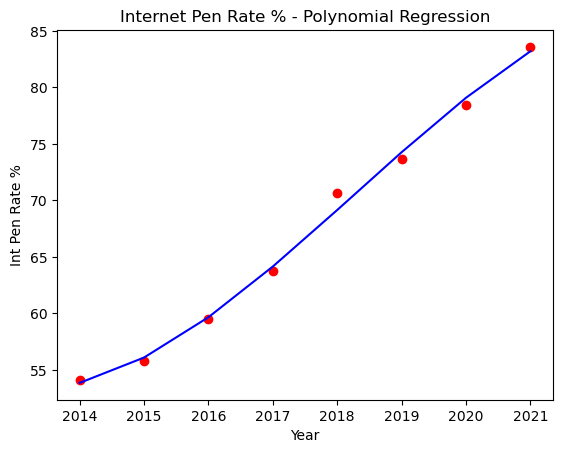

In [23]:
#X_grid = np.arange(min(X), max(X), 0.01)
#X_grid = X_grid.reshape((len(X_grid), 1)) #we incremented the predictions by 0.1 instead of 1
# Uncomment and replace X_grid in plt.plot to inhance the visualization with higher resolution and smoother curve

X_reshaped = X.reshape(-1, 1)
plt.scatter(X, y, color = "red")
plt.plot(X, lin_reg_2.predict(poly_reg.fit_transform(X_reshaped)), color = "blue") 
plt.title('Internet Pen Rate % - Polynomial Regression')
plt.xlabel('Year')
plt.ylabel('Int Pen Rate %')
plt.show()

### Prediction of Internet Penetration Rate % based on GDP Per Capita and Urbanization Rate %

In [24]:
from sklearn.model_selection import train_test_split

X_train = romania_data[['GDP Per Capita', 'Urbanization Rate %']]  # Independent variables
y_train = romania_data['Int Pen Rate %']  # Dependent variable

# Create polynomial features for training data
degree = 2  # Degree of the polynomial
poly_features = PolynomialFeatures(degree=degree)
X_train_poly = poly_features.fit_transform(X_train)

# Fit the polynomial regression model
poly_regression = LinearRegression()
poly_regression.fit(X_train_poly, y_train)

# Create test data
X_2019 = pd.DataFrame({'GDP Per Capita': [24109.395360],'Urbanization Rate %': [54.01]}) 
X_2020 = pd.DataFrame({'GDP Per Capita': [23560.998689], 'Urbanization Rate %': [54.182]})
X_2021 = pd.DataFrame({'GDP Per Capita': [25301.317428], 'Urbanization Rate %': [54.305]})

# For the features of years 2022-2024 I used the predictions that ARIMA made
X_2022 = pd.DataFrame({'GDP Per Capita': [25718.395360], 'Urbanization Rate %': [54.488794]}) 
X_2023 = pd.DataFrame({'GDP Per Capita': [26803.998689], 'Urbanization Rate %': [54.668237]})
X_2024 = pd.DataFrame({'GDP Per Capita': [27825.317428], 'Urbanization Rate %': [54.862340]})

# Create polynomial features for test data
X_2019_poly = poly_features.transform(X_2019)
X_2020_poly = poly_features.transform(X_2020)
X_2021_poly = poly_features.transform(X_2021)

X_2022_poly = poly_features.transform(X_2022)
X_2023_poly = poly_features.transform(X_2023)
X_2024_poly = poly_features.transform(X_2024)

# Predict the Internet Pen Rate using the trained model
y_2019 = poly_regression.predict(X_2019_poly)
y_2020 = poly_regression.predict(X_2020_poly)
y_2021 = poly_regression.predict(X_2021_poly)

y_2022 = poly_regression.predict(X_2022_poly)
y_2023 = poly_regression.predict(X_2023_poly)
y_2024 = poly_regression.predict(X_2024_poly)


print("Polynomial Regression predictions:\n")
print("Internet Pen Rate 2019:", y_2019)
print("Internet Pen Rate 2020:", y_2020)
print("Internet Pen Rate 2021:", y_2021)
print("Internet Pen Rate 2022:", y_2022)
print("Internet Pen Rate 2023:", y_2023)
print("Internet Pen Rate 2024:", y_2024)

Polynomial Regression predictions:

Internet Pen Rate 2019: [71.21372277]
Internet Pen Rate 2020: [77.95758866]
Internet Pen Rate 2021: [81.93727184]
Internet Pen Rate 2022: [88.49993384]
Internet Pen Rate 2023: [92.69872115]
Internet Pen Rate 2024: [96.32601169]


<b>Model evaluation<b>

In [25]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Actual values for years 2019-2021
y_actual_2019_2021 = ([73.65747575], [78.45526895], [83.5904265])

# Actual values for years 2022-2024 gathered from the predictions that ARIMA made
y_actual_2022_2024 = ([88.206150], [92.88535], [97.55608])

# Predicted values for years 2019-2021
y_pred_2019_2021 = ([71.21372277], [77.95758866], [81.93727184])

# Predicted values for years 2022-2024
y_pred_2022_2024 = ([88.49993384], [92.69872115], [96.32601169])

# Create polynomial features for test data
X_2019_poly = poly_features.transform(X_2019)
X_2020_poly = poly_features.transform(X_2020)
X_2021_poly = poly_features.transform(X_2021)

X_2022_poly = poly_features.transform(X_2022)
X_2023_poly = poly_features.transform(X_2023)
X_2024_poly = poly_features.transform(X_2024)

# Concatenate the test data with polynomial features
X_test_2019_2021 = np.concatenate((X_2019_poly, X_2020_poly, X_2021_poly), axis=0)

X_test_2022_2024 = np.concatenate((X_2022_poly, X_2023_poly, X_2024_poly), axis=0)

# Calculate the model accuracy
accuracy_2019_2021 = poly_regression.score(X_test_2019_2021, y_actual_2019_2021)

accuracy_2022_2024 = poly_regression.score(X_test_2022_2024, y_actual_2022_2024)

# Print the model accuracy for years 2019-2021
print("Model Accuracy 2019-2021:", accuracy_2019_2021)

# Calculate Mean Absolute Error (MAE)
mae_2019_2021 = mean_absolute_error(y_actual_2019_2021, y_pred_2019_2021)

# Calculate Mean Squared Error (MSE)
mse_2019_2021 = mean_squared_error(y_actual_2019_2021, y_pred_2019_2021)

# Calculate Root Mean Squared Error (RMSE)
rmse_2019_2021 = np.sqrt(mse_2019_2021)

# Calculate R-squared score
r2_2019_2021 = r2_score(y_actual_2019_2021, y_pred_2019_2021)

# Print the regression metrics
print("Mean Absolute Error (MAE):", mae_2019_2021)
print("Mean Squared Error (MSE):", mse_2019_2021)
print("Root Mean Squared Error (RMSE):", rmse_2019_2021)
print("R-squared Score:", r2_2019_2021)

# Print the model accuracy for years 2022-2024
print("\nModel Accuracy 2022-2024:", accuracy_2022_2024)

# Calculate Mean Absolute Error (MAE)
mae_2022_2024 = mean_absolute_error(y_actual_2022_2024, y_pred_2022_2024)

# Calculate Mean Squared Error (MSE)
mse_2022_2024 = mean_squared_error(y_actual_2022_2024, y_pred_2022_2024)

# Calculate Root Mean Squared Error (RMSE)
rmse_2022_2024 = np.sqrt(mse_2022_2024)

# Calculate R-squared score
r2_2022_2024 = r2_score(y_actual_2022_2024, y_pred_2022_2024)

# Print the regression metrics
print("Mean Absolute Error (MAE):", mae_2022_2024)
print("Mean Squared Error (MSE):", mse_2022_2024)
print("Root Mean Squared Error (RMSE):", rmse_2022_2024)
print("R-squared Score:", r2_2022_2024)



Model Accuracy 2019-2021: 0.8185936528845452
Mean Absolute Error (MAE): 1.5315293100000058
Mean Squared Error (MSE): 2.984178209397708
Root Mean Squared Error (RMSE): 1.7274774121237326
R-squared Score: 0.8185936532097915

Model Accuracy 2022-2024: 0.9626130267828837
Mean Absolute Error (MAE): 0.5701603333333338
Mean Squared Error (MSE): 0.5447357731879036
Root Mean Squared Error (RMSE): 0.7380621743375714
R-squared Score: 0.962613026572861


### Prediction of Internet Penetration Rate % based on GDP Per Capita, GDP Growth % and Urbanization Rate %

In [26]:
from sklearn.model_selection import train_test_split

X_train = romania_data[['GDP Per Capita', 'GDP Growth %','Urbanization Rate %']]  # Independent variables
y_train = romania_data['Int Pen Rate %']  # Dependent variable

# Create polynomial features for training data
degree = 1  # Degree of the polynomial
poly_features = PolynomialFeatures(degree=degree)
X_train_poly = poly_features.fit_transform(X_train)

# Fit the polynomial regression model
poly_regression = LinearRegression()
poly_regression.fit(X_train_poly, y_train)

# Create test data
X_2019 = pd.DataFrame({'GDP Per Capita': [24109.395360], 'GDP Growth %':[4.05],'Urbanization Rate %': [54.01]}) 
X_2020 = pd.DataFrame({'GDP Per Capita': [23560.998689], 'GDP Growth %':[-2.108], 'Urbanization Rate %': [54.182]})
X_2021 = pd.DataFrame({'GDP Per Capita': [25301.317428], 'GDP Growth %':[6.21], 'Urbanization Rate %': [54.305]})

# For the features of years 2022-2024 I used the ARIMA predictions 
X_2022 = pd.DataFrame({'GDP Per Capita': [25718.395360], 'GDP Growth %':[2.493815], 'Urbanization Rate %': [54.488794 ]}) 
X_2023 = pd.DataFrame({'GDP Per Capita': [26803.998689], 'GDP Growth %':[5.267847], 'Urbanization Rate %': [54.668237]})
X_2024 = pd.DataFrame({'GDP Per Capita': [27825.317428], 'GDP Growth %':[2.674409], 'Urbanization Rate %': [54.862340]})

# Create polynomial features for test data
X_2019_poly = poly_features.transform(X_2019)
X_2020_poly = poly_features.transform(X_2020)
X_2021_poly = poly_features.transform(X_2021)

X_2022_poly = poly_features.transform(X_2022)
X_2023_poly = poly_features.transform(X_2023)
X_2024_poly = poly_features.transform(X_2024)

# Predict the Internet Pen Rate using the trained model
y_2019 = poly_regression.predict(X_2019_poly)
y_2020 = poly_regression.predict(X_2020_poly)
y_2021 = poly_regression.predict(X_2021_poly)

y_2022 = poly_regression.predict(X_2022_poly)
y_2023 = poly_regression.predict(X_2023_poly)
y_2024 = poly_regression.predict(X_2024_poly)

y_2024 = np.where(y_2024 > 100, 100, y_2024)

print("Polynomial Regression predictions:\n")
print("Internet Pen Rate 2019:", y_2019)
print("Internet Pen Rate 2020:", y_2020)
print("Internet Pen Rate 2021:", y_2021)
print("Internet Pen Rate 2022:", y_2022)
print("Internet Pen Rate 2023:", y_2023)
print("Internet Pen Rate 2024:", y_2024)

Polynomial Regression predictions:

Internet Pen Rate 2019: [73.91405884]
Internet Pen Rate 2020: [78.34529515]
Internet Pen Rate 2021: [84.45213824]
Internet Pen Rate 2022: [91.36834694]
Internet Pen Rate 2023: [98.45222691]
Internet Pen Rate 2024: [100.]


<b>Model Evaluation<b>

In [27]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Actual values for years 2019-2021
y_actual_2019_2021 = ([73.65747575], [78.45526895], [83.5904265])

# Actual values for years 2022-2024 gathered from the predictions that ARIMA made
y_actual_2022_2024 = ([88.206150], [92.88535], [97.55608])

# Predicted values for years 2019-2021
y_pred_2019_2021 = ([73.91405884], [78.34529515], [84.45213824])

# Predicted values for years 2022-2024
y_pred_2022_2024 = ([91.36834694], [98.45222691], [100.])

# Create polynomial features for test data
X_2019_poly = poly_features.transform(X_2019)
X_2020_poly = poly_features.transform(X_2020)
X_2021_poly = poly_features.transform(X_2021)

X_2022_poly = poly_features.transform(X_2022)
X_2023_poly = poly_features.transform(X_2023)
X_2024_poly = poly_features.transform(X_2024)

# Concatenate the test data with polynomial features
X_test_2019_2021 = np.concatenate((X_2019_poly, X_2020_poly, X_2021_poly), axis=0)

X_test_2022_2024 = np.concatenate((X_2022_poly, X_2023_poly, X_2024_poly), axis=0)

# Calculate the model accuracy
accuracy_2019_2021 = poly_regression.score(X_test_2019_2021, y_actual_2019_2021)

accuracy_2022_2024 = poly_regression.score(X_test_2022_2024, y_actual_2022_2024)

# Print the model accuracy for years 2019-2021
print("Model Accuracy 2019-2021:", accuracy_2019_2021)

# Calculate Mean Absolute Error (MAE)
mae_2019_2021 = mean_absolute_error(y_actual_2019_2021, y_pred_2019_2021)

# Calculate Mean Squared Error (MSE)
mse_2019_2021 = mean_squared_error(y_actual_2019_2021, y_pred_2019_2021)

# Calculate Root Mean Squared Error (RMSE)
rmse_2019_2021 = np.sqrt(mse_2019_2021)

# Calculate R-squared score
r2_2019_2021 = r2_score(y_actual_2019_2021, y_pred_2019_2021)

# Print the regression metrics
print("Mean Absolute Error (MAE):", mae_2019_2021)
print("Mean Squared Error (MSE):", mse_2019_2021)
print("Root Mean Squared Error (RMSE):", rmse_2019_2021)
print("R-squared Score:", r2_2019_2021)

# Print the model accuracy for years 2022-2024
print("\nModel Accuracy 2022-2024:", accuracy_2022_2024)

# Calculate Mean Absolute Error (MAE)
mae_2022_2024 = mean_absolute_error(y_actual_2022_2024, y_pred_2022_2024)

# Calculate Mean Squared Error (MSE)
mse_2022_2024 = mean_squared_error(y_actual_2022_2024, y_pred_2022_2024)

# Calculate Root Mean Squared Error (RMSE)
rmse_2022_2024 = np.sqrt(mse_2022_2024)

# Calculate R-squared score
r2_2022_2024 = r2_score(y_actual_2022_2024, y_pred_2022_2024)

# Print the regression metrics
print("Mean Absolute Error (MAE):", mae_2022_2024)
print("Mean Squared Error (MSE):", mse_2022_2024)
print("Root Mean Squared Error (RMSE):", rmse_2022_2024)
print("R-squared Score:", r2_2022_2024)

Model Accuracy 2019-2021: 0.9833745855185466
Mean Absolute Error (MAE): 0.4094228766666627
Mean Squared Error (MSE): 0.2734920805380652
Root Mean Squared Error (RMSE): 0.5229647029561987
R-squared Score: 0.9833745856563716

Model Accuracy 2022-2024: -2.0230030918754154
Mean Absolute Error (MAE): 3.7243312833333326
Mean Squared Error (MSE): 15.654117661612148
Root Mean Squared Error (RMSE): 3.9565284861368237
R-squared Score: -0.07439259517498198
